# Using Groupby and Transform

In [1]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np

In [2]:
districts = pd.read_csv(tt.data('FL-COUNTY-BY-DISTRICT'))
districts.head()

,County,District
0,Charlotte,1
1,Collier,1
2,DeSoto,1
3,Glades,1
4,Hardee,1


In [3]:
bridges = pd.read_csv(tt.data('FL-BRIDGES'))

# Recall the necessary cleaning for the bridges data file
bridges = bridges.replace('-', 0)
bridges[['Poor #', 'SD #']] = bridges[['Poor #', 'SD #']].astype(int)
bridges.fillna(0, inplace=True)

bridges.head()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
0,ALACHUA (001),111,64,47,0,0,64767,55794,8973,0.0,0.0
1,BAKER (003),89,30,52,7,8,32162,19369,12282,510.0,623.0
2,BAY (005),122,49,63,10,11,210039,98834,109628,1577.0,10120.0
3,BRADFORD (007),62,23,37,2,2,9330,5492,3217,620.0,620.0
4,BREVARD (009),241,160,81,0,0,364138,204179,159959,0.0,0.0


In [4]:
bridges['County'] = bridges['County'].str[:-6]
districts['County'] = districts['County'].str.upper()

In [5]:
bridges_2 = pd.merge(
    bridges,
    districts[['County','District']],
    on='County',
)

In [6]:
bridges_2.head()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area,District
0,ALACHUA,111,64,47,0,0,64767,55794,8973,0.0,0.0,2
1,BAKER,89,30,52,7,8,32162,19369,12282,510.0,623.0,2
2,BAY,122,49,63,10,11,210039,98834,109628,1577.0,10120.0,3
3,BRADFORD,62,23,37,2,2,9330,5492,3217,620.0,620.0,2
4,BREVARD,241,160,81,0,0,364138,204179,159959,0.0,0.0,5


In [7]:
bridges_2['SD Area Share in its District'] = bridges_2.groupby('District')[['SD Area']].transform(lambda x: (x / x.sum()))

In [19]:
bridges_2 = bridges_2.drop(['SD Area Share in District'], axis=1)
bridges_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   County      64 non-null     object 
 1   Total #     64 non-null     int64  
 2   Good #      64 non-null     int64  
 3   Fair #      64 non-null     int64  
 4   Poor #      64 non-null     int64  
 5   SD #        64 non-null     int64  
 6   Total Area  64 non-null     int64  
 7   Good Area   64 non-null     int64  
 8   Fair Area   64 non-null     int64  
 9   Poor Area   64 non-null     float64
 10  SD Area     64 non-null     float64
 11  District    64 non-null     int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 9.0+ KB


In [20]:
bridges_2['SD Area Share in its District'] = bridges_2.groupby('District')[['SD Area']].transform(lambda x: (x / x.sum()))

In [21]:
bridges_2.head()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area,District,SD Area Share in its District
0,ALACHUA,111,64,47,0,0,64767,55794,8973,0.0,0.0,2,0.000000
1,BAKER,89,30,52,7,8,32162,19369,12282,510.0,623.0,2,0.010061
2,BAY,122,49,63,10,11,210039,98834,109628,1577.0,10120.0,3,0.071854
3,BRADFORD,62,23,37,2,2,9330,5492,3217,620.0,620.0,2,0.010012
4,BREVARD,241,160,81,0,0,364138,204179,159959,0.0,0.0,5,0.000000


In [23]:
bridges_2.loc[bridges_2['SD Area Share in its District'].idxmax()]

County                           PALM BEACH
Total #                                 604
Good #                                  516
Fair #                                   81
Poor #                                    7
SD #                                      7
Total Area                           805336
Good Area                            647923
Fair Area                            120878
Poor Area                             36535
SD Area                               36535
District                                  4
SD Area Share in its District      0.960083
Name: 48, dtype: object

# Using Pivot Tables

In [25]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np

In [27]:
tour = pd.read_csv(tt.data('SERPM8-BASE2015-TOURS'))
tour.head()

,hh_id,person_id,person_num,person_type,tour_id,tour_category,tour_purpose,orig_mgra,dest_mgra,start_period,...,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20
0,1690841,4502948,1,1,0,MANDATORY,Work,7736,9290,8,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1690841,4502948,1,1,1,AT_WORK,Work-Based,9290,7980,13,...,0.000319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1690841,4502948,1,1,2,AT_WORK,Work-Based,9290,10608,19,...,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1690841,4502949,2,2,0,MANDATORY,Work,7736,8289,27,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1690841,4502949,2,2,1,MANDATORY,Work,7736,8289,31,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47485 entries, 0 to 47484
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hh_id          47485 non-null  int64  
 1   person_id      47485 non-null  int64  
 2   person_num     47485 non-null  int64  
 3   person_type    47485 non-null  int64  
 4   tour_id        47485 non-null  int64  
 5   tour_category  47485 non-null  object 
 6   tour_purpose   47485 non-null  object 
 7   orig_mgra      47485 non-null  int64  
 8   dest_mgra      47485 non-null  int64  
 9   start_period   47485 non-null  int64  
 10  end_period     47485 non-null  int64  
 11  tour_mode      47485 non-null  int64  
 12  tour_distance  47485 non-null  float64
 13  tour_time      47485 non-null  float64
 14  atWork_freq    47485 non-null  int64  
 15  num_ob_stops   47485 non-null  int64  
 16  num_ib_stops   47485 non-null  int64  
 17  out_btap       47485 non-null  int64  
 18  out_at

In [28]:
tour_mode_dict = {
    1: "DRIVEALONEFREE",
    2: "DRIVEALONEPAY",
    3: "SHARED2GP",
    4: "SHARED2PAY",
    5: "SHARED3GP",
    6: "SHARED3PAY",
    7: "TNCALONE",
    8: "TNCSHARED",
    9: "WALK",
    10: "BIKE",
    11: "WALK_MIX",
    12: "WALK_PRMW",
    13: "WALK_PRMD",
    14: "PNR_MIX",
    15: "PNR_PRMW",
    16: "PNR_PRMD",
    17: "KNR_MIX",
    18: "KNR_PRMW",
    19: "KNR_PRMD",
    20: "SCHBUS",
}

In [30]:
tour[['tour_mode', 'tour_purpose', 'tour_distance']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47485 entries, 0 to 47484
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tour_mode      47485 non-null  int64  
 1   tour_purpose   47485 non-null  object 
 2   tour_distance  47485 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


In [31]:
tour['tour_mode'] = tour['tour_mode'].map(tour_mode_dict)

In [32]:
tour.tour_mode.value_counts()

DRIVEALONEFREE    25911
SHARED2GP         10013
SHARED3GP          4857
DRIVEALONEPAY      2057
SCHBUS             1590
WALK               1213
BIKE                674
SHARED2PAY          500
SHARED3PAY          465
WALK_MIX            171
PNR_PRMW             11
KNR_PRMD              9
KNR_MIX               5
KNR_PRMW              3
PNR_PRMD              3
PNR_MIX               3
Name: tour_mode, dtype: int64

In [33]:
tour.tour_purpose.value_counts()

Work             16238
Shop              6291
School            5605
Discretionary     4980
Maintenance       4787
Eating Out        3064
Visiting          2641
Work-Based        2260
University         820
Escort             799
Name: tour_purpose, dtype: int64

In [34]:
tour.pivot_table(index = 'tour_mode', columns = 'tour_purpose', values = 'tour_distance')

tour_purpose,Discretionary,Eating Out,Escort,Maintenance,School,Shop,University,Visiting,Work,Work-Based
tour_mode,,,,,,,,,,
BIKE,2.764216,3.739237,NaN,2.872279,3.100353,4.323302,4.953091,2.448940,4.034763,NaN
DRIVEALONEFREE,5.681107,6.299282,3.848886,4.993209,4.396832,8.658878,7.974719,6.533719,12.089045,3.387014
DRIVEALONEPAY,38.526133,21.259400,23.726999,22.798727,NaN,59.314263,NaN,34.439682,38.741760,19.173934
KNR_MIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.410000,NaN
KNR_PRMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.558556,NaN
KNR_PRMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.154332,NaN
PNR_MIX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.311667,NaN
PNR_PRMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.115000,NaN
PNR_PRMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.980637,NaN


In [35]:
tour.pivot_table(columns = 'tour_purpose', values = 'tour_distance')

tour_purpose,Discretionary,Eating Out,Escort,Maintenance,School,Shop,University,Visiting,Work,Work-Based
tour_distance,6.355063,6.341543,4.266534,5.413463,4.53435,13.421542,7.796431,7.534867,15.804213,3.841985


In [36]:
tour.pivot_table(index = 'tour_mode', values = 'tour_distance', aggfunc = ['median'])

,median
,tour_distance
tour_mode,
BIKE,2.890500
DRIVEALONEFREE,6.098000
DRIVEALONEPAY,31.275000
KNR_MIX,29.497999
KNR_PRMD,36.278000
KNR_PRMW,18.084999
PNR_MIX,16.518000
PNR_PRMD,55.566002


# Using Linear Regression

In [37]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [38]:
per = pd.read_csv(tt.data('SERPM8-BASE2015-PERSONS'))
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))

In [39]:
per.head()

,hh_id,person_id,person_num,age,gender,type,value_of_time,activity_pattern,imf_choice,inmf_choice,fp_choice,reimb_pct,wrkr_type
0,1690841,4502948,1,46,m,Full-time worker,5.072472,M,1,1,-1,0.0,0
1,1690841,4502949,2,47,f,Part-time worker,5.072472,M,2,37,-1,0.0,0
2,1690841,4502950,3,11,f,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
3,1690841,4502951,4,8,m,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
4,1690961,4503286,1,52,m,Part-time worker,2.447870,M,1,2,-1,0.0,0


In [40]:
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


In [41]:
per = pd.merge(per, hh[['hh_id', 'income', 'autos', 'transponder']], on = 'hh_id', how = 'inner')

In [42]:
per['female'] = np.where((per.gender == 'f'), 1, 0)
per['full_time'] = np.where((per.type == 'Full-time worker'), 1, 0)
per['hh_income(100k)'] = per['income'] / 100000

In [43]:
per.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40683 entries, 0 to 40682
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hh_id             40683 non-null  int64  
 1   person_id         40683 non-null  int64  
 2   person_num        40683 non-null  int64  
 3   age               40683 non-null  int64  
 4   gender            40683 non-null  object 
 5   type              40683 non-null  object 
 6   value_of_time     40683 non-null  float64
 7   activity_pattern  40683 non-null  object 
 8   imf_choice        40683 non-null  int64  
 9   inmf_choice       40683 non-null  int64  
 10  fp_choice         40683 non-null  int64  
 11  reimb_pct         40683 non-null  float64
 12  wrkr_type         40683 non-null  int64  
 13  income            40683 non-null  int64  
 14  autos             40683 non-null  int64  
 15  transponder       40683 non-null  int64  
 16  female            40683 non-null  int64 

In [44]:
per.head()

,hh_id,person_id,person_num,age,gender,type,value_of_time,activity_pattern,imf_choice,inmf_choice,fp_choice,reimb_pct,wrkr_type,income,autos,transponder,female,full_time,hh_income(100k)
0,1690841,4502948,1,46,m,Full-time worker,5.072472,M,1,1,-1,0.0,0,512000,2,1,0,1,5.120
1,1690841,4502949,2,47,f,Part-time worker,5.072472,M,2,37,-1,0.0,0,512000,2,1,1,0,5.120
2,1690841,4502950,3,11,f,Student of non-driving age,3.381665,M,3,1,-1,0.0,0,512000,2,1,1,0,5.120
3,1690841,4502951,4,8,m,Student of non-driving age,3.381665,M,3,1,-1,0.0,0,512000,2,1,0,0,5.120
4,1690961,4503286,1,52,m,Part-time worker,2.447870,M,1,2,-1,0.0,0,27500,1,0,0,0,0.275


In [45]:
model = sm.OLS(per['value_of_time'], sm.add_constant(per[['age', 'female', 'full_time', 'hh_income(100k)']]))
result = model.fit()

In [46]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          value_of_time   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     384.5
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:11:27   Log-Likelihood:            -1.4546e+05
No. Observations:               40683   AIC:                         2.909e+05
Df Residuals:                   40678   BIC:                         2.910e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9651      0.116     

In [47]:
model = sm.OLS(
    per['value_of_time'],
    sm.add_constant(per[['age', 'female', 'full_time', 'hh_income(100k)', 'autos']])
)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          value_of_time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     336.2
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:14:15   Log-Likelihood:            -1.4539e+05
No. Observations:               40683   AIC:                         2.908e+05
Df Residuals:                   40677   BIC:                         2.909e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.6471      0.161     

# Using Heatmaps

In [48]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

In [49]:
trip = pd.read_csv(tt.data('SERPM8-BASE2015-TRIPS'))
trip.head()

,hh_id,person_id,person_num,tour_id,stop_id,inbound,tour_purpose,orig_purpose,dest_purpose,orig_mgra,dest_mgra,parking_mgra,stop_period,trip_mode,trip_board_tap,trip_alight_tap,tour_mode,smplRate_geo,autotech,tncmemb
0,1690841,4502948,1,0,-1,0,Work,Home,Work,7736,9290,-1,8,6,0,0,6,1.0,0,0
1,1690841,4502948,1,0,-1,1,Work,Work,Home,9290,7736,0,29,3,0,0,6,1.0,0,0
2,1690841,4502948,1,1,-1,0,Work-Based,Work,Work-Based,9290,7980,-1,13,1,0,0,1,1.0,0,0
3,1690841,4502948,1,1,-1,1,Work-Based,Work-Based,Work,7980,9290,-1,14,1,0,0,1,1.0,0,0
4,1690841,4502948,1,2,-1,0,Work-Based,Work,Work-Based,9290,10608,-1,19,3,0,0,3,1.0,0,0


In [50]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


In [51]:
hh_trip_count = trip.groupby(['hh_id']).size().rename('trip_count')

In [52]:
hh_trip_count.head()

hh_id
1690841    20
1690851    12
1690853     8
1690856    23
1690858     5
Name: trip_count, dtype: int64

In [53]:
data = pd.merge(hh_trip_count, hh, on = 'hh_id', how = 'left')

In [54]:
data.head()

,hh_id,trip_count,Unnamed: 0,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,1690841,20,426629,7736,512000,2,1,MMMM0,0,0,0
1,1690851,12,426645,7736,68200,4,1,HNM0,0,0,0
2,1690853,8,426643,7736,127000,2,0,MMMH0,0,0,0
3,1690856,23,426642,7736,59500,4,1,MNMMMM0,0,0,0
4,1690858,5,426640,7736,200030,1,0,M0,0,0,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17260 entries, 0 to 17259
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   hh_id         17260 non-null  int64 
 1   trip_count    17260 non-null  int64 
 2   Unnamed: 0    17260 non-null  int64 
 3   home_mgra     17260 non-null  int64 
 4   income        17260 non-null  int64 
 5   autos         17260 non-null  int64 
 6   transponder   17260 non-null  int64 
 7   cdap_pattern  17260 non-null  object
 8   jtf_choice    17260 non-null  int64 
 9   autotech      17260 non-null  int64 
 10  tncmemb       17260 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 1.6+ MB


In [59]:
data_pivot = data.pivot_table(index = 'autos', columns = 'trip_count', aggfunc = 'size')

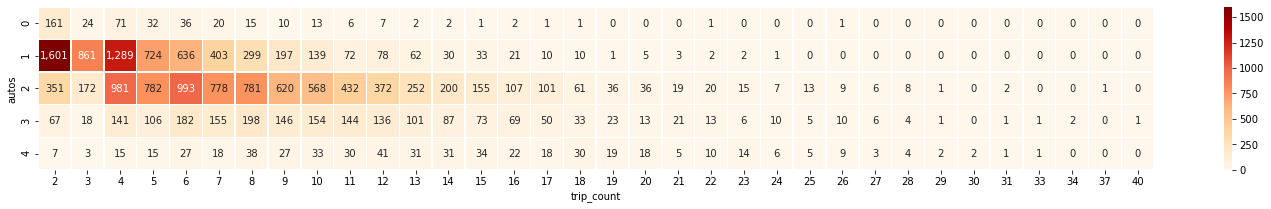

In [60]:
plt.figure(figsize = (25, 3))
ax = sns.heatmap(data_pivot.fillna(0), annot = True, fmt = ",.0f", linewidths=.5, cmap = 'OrRd')

# Using Boxplots

In [62]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
hh = pd.read_csv(tt.data('SERPM8-BASE2015-HOUSEHOLDS'))
hh.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb
0,426629,1690841,7736,512000,2,1,MMMM0,0,0,0
1,426630,1690961,7736,27500,1,0,MNMM0,0,0,0
2,426631,1690866,7736,150000,2,0,HMM0,0,0,0
3,426632,1690895,7736,104000,2,1,MMMM0,0,0,0
4,426633,1690933,7736,95000,2,1,MNM0,0,0,0


In [64]:
person = pd.read_csv(tt.data('SERPM8-BASE2015-PERSONS'))
person.head()

,hh_id,person_id,person_num,age,gender,type,value_of_time,activity_pattern,imf_choice,inmf_choice,fp_choice,reimb_pct,wrkr_type
0,1690841,4502948,1,46,m,Full-time worker,5.072472,M,1,1,-1,0.0,0
1,1690841,4502949,2,47,f,Part-time worker,5.072472,M,2,37,-1,0.0,0
2,1690841,4502950,3,11,f,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
3,1690841,4502951,4,8,m,Student of non-driving age,3.381665,M,3,1,-1,0.0,0
4,1690961,4503286,1,52,m,Part-time worker,2.447870,M,1,2,-1,0.0,0


In [79]:
hh = hh[(hh.income > 0) & (hh.income != 0)]

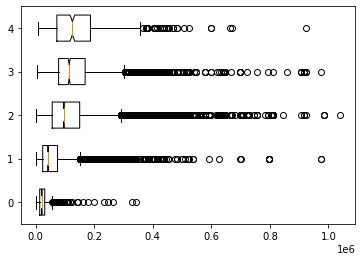

In [84]:
hh_box_1 = list(hh.groupby('autos').income)
plt.boxplot(
    [i[1] for i in hh_box_1],
    vert = False,
    labels = [i[0] for i in hh_box_1],
    notch = True,
    widths = 0.6,
);

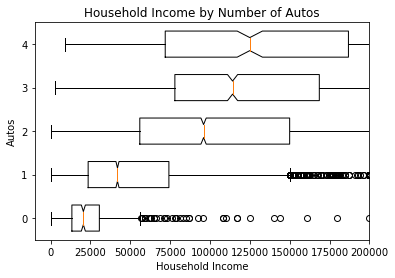

In [67]:
plt.boxplot(
    [i[1] for i in hh_box_1],
    vert = False,
    labels = [i[0] for i in hh_box_1],
    notch = True,
    widths = 0.6,
)
plt.xlim(-10000, 200000)
plt.title('Household Income by Number of Autos')
plt.xlabel('Household Income')
plt.ylabel('Autos');

In [68]:
np.median(hh[hh.autos == 2].income)

96000.0

In [69]:
max_age = person.groupby(['hh_id'])['age'].max().rename('max_age')

In [70]:
hh_2 = pd.merge(hh, max_age, on='hh_id', how='left')
hh_2 = hh_2[(hh_2.max_age > 65) & (hh_2.income > 0)]

In [71]:
hh_2.head()

,Unnamed: 0,hh_id,home_mgra,income,autos,transponder,cdap_pattern,jtf_choice,autotech,tncmemb,max_age
9,426638,1690921,7736,329000,2,0,NN0,0,0,0,84
12,426641,1690904,7736,169750,2,1,MM0,0,0,0,66
20,426649,1690940,7736,22300,1,0,MHM0,0,0,0,68
21,426650,1690965,7736,427400,3,1,NMj,13,0,0,74
28,426657,1691054,7737,289000,3,1,NNj,4,0,0,67


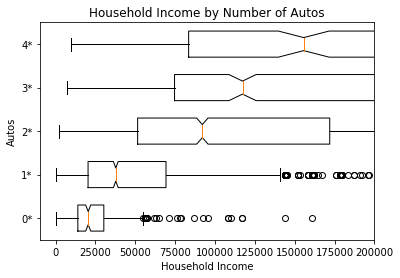

In [72]:
hh_box_2 = list(hh_2.groupby('autos').income)
plt.boxplot(
    [i[1] for i in hh_box_2],
    vert = False,
    labels = [str(i[0])+"*" for i in hh_box_2],
    notch = True,
    widths = 0.6,
)
plt.xlim(-10000,200000)
plt.title('Household Income by Number of Autos')
plt.xlabel('Household Income')
plt.ylabel('Autos');

In [73]:
hh_2[hh_2.autos == 2].income.median()

92100.0

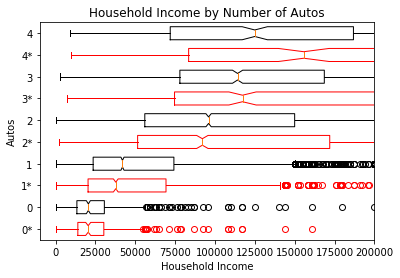

In [74]:
plt.boxplot(
    [i[1] for i in hh_box_1],
    vert = False,
    labels = [i[0] for i in hh_box_1],
    notch = True,
    widths = 0.6,
    positions = range(2, (len(hh_box_2))*2+2, 2),
)

hh_box_2 = list(hh_2.groupby('autos').income)
plt.boxplot(
    [i[1] for i in hh_box_2],
    vert = False,
    labels = [str(i[0])+"*" for i in hh_box_2],
    notch = True,
    widths = 0.6,
    positions = range(1, (len(hh_box_2))*2+1, 2),
    boxprops=dict(color="red"),
    whiskerprops=dict(color="red"),
    capprops=dict(color="red"),
    flierprops=dict(markeredgecolor="red"),
)
plt.xlim(-10000,200000)
plt.title('Household Income by Number of Autos')
plt.xlabel('Household Income')
plt.ylabel('Autos');

# Using Frequency Plots and Bar Charts

In [85]:
import transportation_tutorials as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
bridge = pd.read_csv(tt.data('FL-BRIDGES'))

In [87]:
bridge.head()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
0,ALACHUA (001),111,64,47,-,-,64767,55794,8973,NaN,NaN
1,BAKER (003),89,30,52,7,8,32162,19369,12282,510.0,623.0
2,BAY (005),122,49,63,10,11,210039,98834,109628,1577.0,10120.0
3,BRADFORD (007),62,23,37,2,2,9330,5492,3217,620.0,620.0
4,BREVARD (009),241,160,81,-,-,364138,204179,159959,NaN,NaN


In [88]:
bridge.columns

Index(['County', 'Total #', 'Good #', 'Fair #', 'Poor #', 'SD #', 'Total Area',
       'Good Area', 'Fair Area', 'Poor Area', 'SD Area'],
      dtype='object')

In [89]:
bridge['Poor #'] = bridge['Poor #'].replace('-', 0).astype('int64')
bridge['SD #'] = bridge['SD #'].replace('-', 0).astype('int64')

bridge['Poor Area'] = bridge['Poor #'].replace(np.nan, 0).astype('int64')
bridge['SD Area'] = bridge['Poor #'].replace(np.nan, 0).astype('int64')

In [90]:
bridge.head()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
0,ALACHUA (001),111,64,47,0,0,64767,55794,8973,0,0
1,BAKER (003),89,30,52,7,8,32162,19369,12282,7,7
2,BAY (005),122,49,63,10,11,210039,98834,109628,10,10
3,BRADFORD (007),62,23,37,2,2,9330,5492,3217,2,2
4,BREVARD (009),241,160,81,0,0,364138,204179,159959,0,0


In [91]:
bridge.tail()

,County,Total #,Good #,Fair #,Poor #,SD #,Total Area,Good Area,Fair Area,Poor Area,SD Area
63,VOLUSIA (127),227,144,76,7,7,326665,164435,147618,7,7
64,WAKULLA (129),50,21,23,6,6,17783,10011,7649,6,6
65,WALTON (131),219,125,86,8,9,104108,69478,34056,8,8
66,WASHINGTON (133),96,57,34,5,6,72116,46988,23224,5,5
67,TOTALS,12313,8534,3545,233,256,16759416,11232342,5149876,233,233


In [92]:
bridge_count = bridge[:-1]

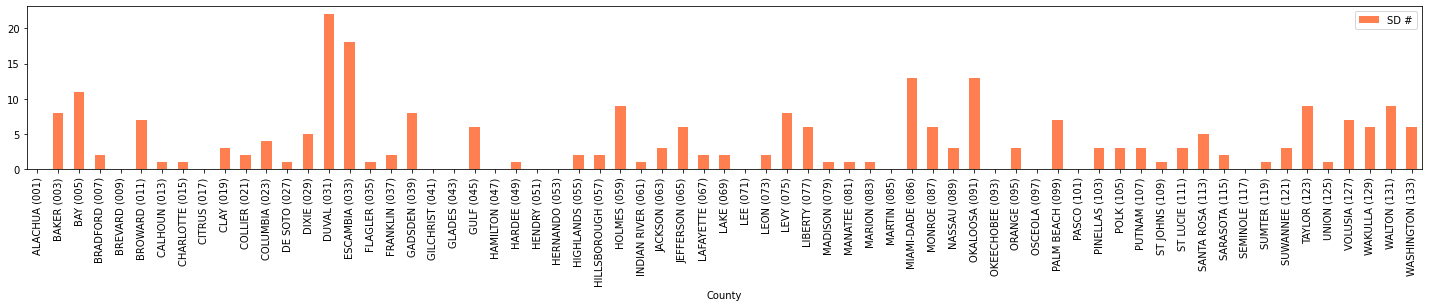

In [93]:
bridge_count.plot( x = 'County', y = 'SD #', kind = 'bar', figsize = (25,3), color = 'coral');

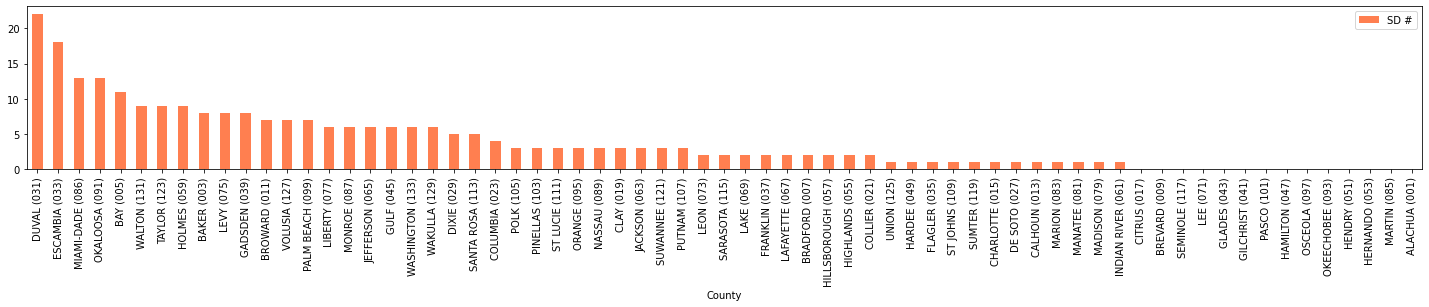

In [94]:
bridge_count.sort_values(by = 'SD #', ascending = False).plot( x = 'County', y = 'SD #', kind = 'bar', figsize = (25,3), color = 'coral');

In [95]:
bridge_count[bridge_count['SD #'] == bridge_count['SD #'].max()]['County'].values[0]

'DUVAL (031)'

In [96]:
bridge_percentage = bridge[:-1]

In [97]:
bridge_percentage['Good %'] = bridge_percentage['Good #'] * 100 / bridge_percentage['Total #']

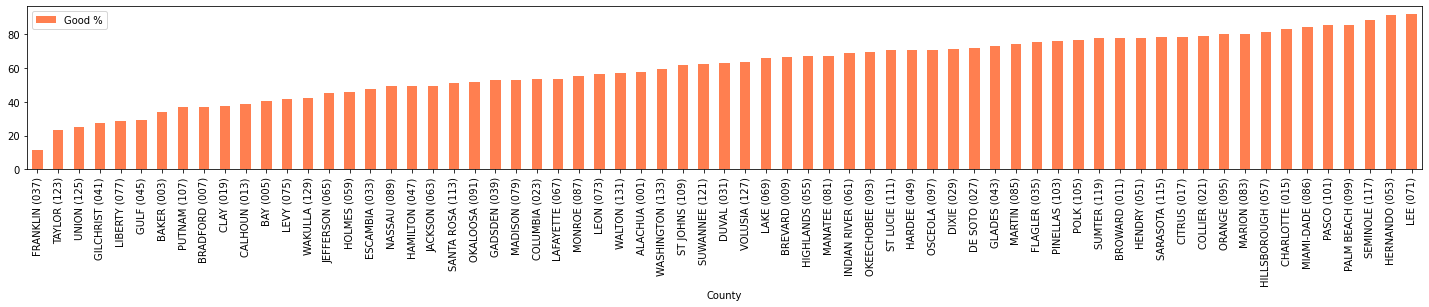

In [98]:
bridge_percentage.sort_values(by = 'Good %', ascending = True).plot(x = 'County', y = 'Good %', kind = 'bar', figsize = (25,3), color = 'coral');

In [99]:
bridge_percentage[bridge_percentage['Good %'] == bridge_percentage['Good %'].min()]['County'].values[0]

'FRANKLIN (037)'

# Using Selection by Geography

In [100]:
import transportation_tutorials as tt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
from shapely.geometry import Polygon

In [101]:
maz = gpd.read_file(tt.data('SERPM8-MAZSHAPE'))

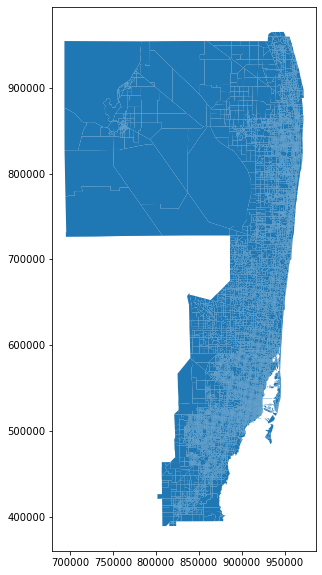

In [102]:
maz.plot(figsize = (10,10));

In [103]:
maz.head()

,OBJECTID,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,geometry
0,1,5347,8589.393674,3.111034e+06,71,953130,724165,"POLYGON ((953970.466 723936.081, 953972.382 72..."
1,2,5348,11974.067469,7.628753e+06,175,907018,634551,"POLYGON ((908505.280 635081.774, 908488.945 63..."
2,3,5349,9446.131753,4.007041e+06,92,923725,707062,"POLYGON ((922736.637 708387.692, 923950.960 70..."
3,4,5350,21773.153739,2.487397e+07,571,908988,713484,"POLYGON ((908334.237 715692.263, 908714.653 71..."
4,5,5351,17882.701416,1.963139e+07,451,909221,717493,"POLYGON ((911883.019 719309.326, 911940.995 71..."


In [104]:
clipper_poly = Polygon([
    (-80.170862, 26.328588),
    (-80.170158, 26.273494),
    (-80.113007, 26.274882),
    (-80.104592, 26.293503),
    (-80.072967, 26.293790),
    (-80.070111, 26.329349)
])

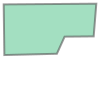

In [105]:
clipper_poly

In [106]:
city = ox.gdf_from_place('Deerfield Beach, Florida, USA')

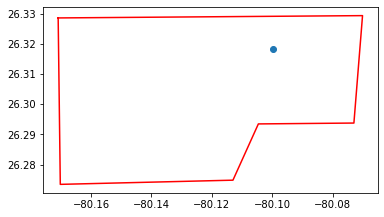

In [107]:
ax = city.plot()
lines = ax.plot(*clipper_poly.exterior.xy, color = 'r')

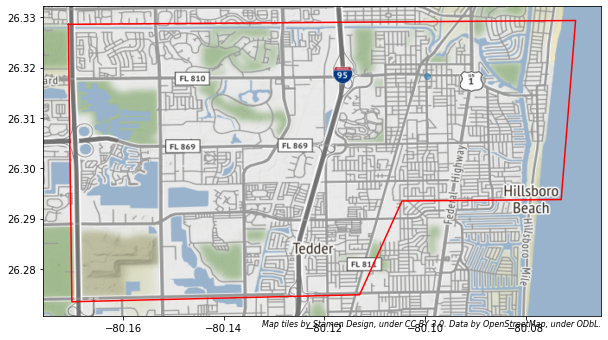

In [108]:
ax = city.plot(alpha=0.5)
lines = ax.plot(*clipper_poly.exterior.xy, color = 'r')
ax = tt.mapping.add_basemap(ax, zoom=13, epsg=4326)

In [109]:
maz.crs

<Projected CRS: EPSG:2236>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Florida - SPCS - E
- bounds: (-82.33, 24.41, -79.97, 30.83)
Coordinate Operation:
- name: SPCS83 Florida East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [110]:
clipper_gdf = gpd.GeoDataFrame(index=[0], crs={'init': 'epsg:4326'}, geometry=[clipper_poly]).to_crs(epsg=2236)
clipper_poly = clipper_gdf.geometry[0]

In [111]:
maz_4326 = maz.to_crs(epsg = 4326)

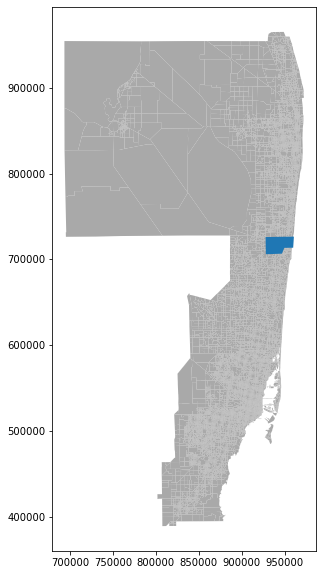

In [117]:
ax = maz.plot(figsize = (10,10), color = 'darkgrey')
clipper_gdf.plot(ax=ax);

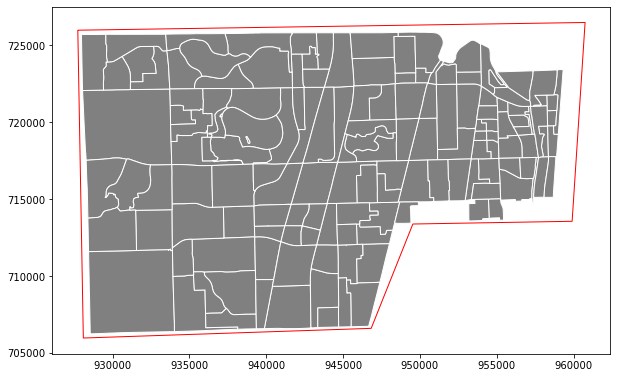

In [118]:
maz_within = maz[maz.within(clipper_gdf.geometry[0])]
ax = maz_within.plot(figsize = (10,10), color = 'grey', edgecolor = 'w')
clipper_gdf.plot(ax=ax, color='none', edgecolor = 'r');

In [119]:
print('There are {} MAZs inside the study area.'.format(maz_within.shape[0]))

There are 143 MAZs inside the study area.


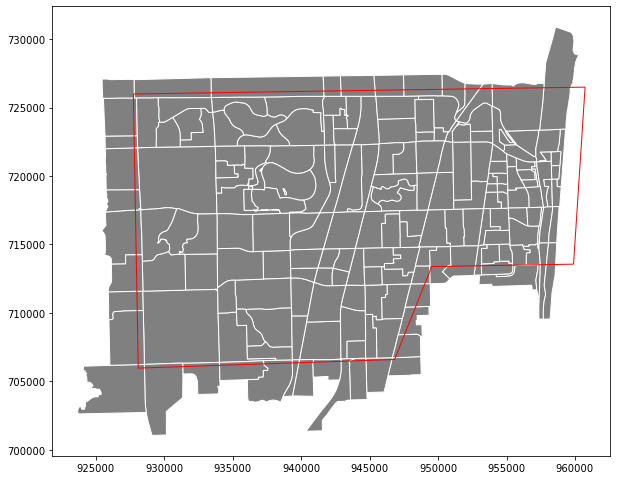

In [120]:
maz_intersects = maz[maz.intersects(clipper_poly)]
ax = maz_intersects.plot(
    figsize = (10,10),
    color = 'grey',
    edgecolor = 'w'
)
clipper_gdf.plot(ax=ax, color='none', edgecolor = 'r');

In [121]:
print('There are {} MAZs at least partially inside the study area.'.format(maz_intersects.shape[0]))

There are 189 MAZs at least partially inside the study area.


# Using Spatial Joins

In [122]:
import transportation_tutorials as tt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [123]:
maz = gpd.read_file(tt.data('SERPM8-MAZSHAPE'))
taz = gpd.read_file(tt.data('SERPM8-TAZSHAPE'))

In [124]:
maz.head()

,OBJECTID,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,geometry
0,1,5347,8589.393674,3.111034e+06,71,953130,724165,"POLYGON ((953970.466 723936.081, 953972.382 72..."
1,2,5348,11974.067469,7.628753e+06,175,907018,634551,"POLYGON ((908505.280 635081.774, 908488.945 63..."
2,3,5349,9446.131753,4.007041e+06,92,923725,707062,"POLYGON ((922736.637 708387.692, 923950.960 70..."
3,4,5350,21773.153739,2.487397e+07,571,908988,713484,"POLYGON ((908334.237 715692.263, 908714.653 71..."
4,5,5351,17882.701416,1.963139e+07,451,909221,717493,"POLYGON ((911883.019 719309.326, 911940.995 71..."


In [126]:
taz.head()

,OBJECTID,TAZ_REG,TAZ_OLD05,TAZ_MPO,COUNTY,CENSUSTAZ,TAZ_BF,FIX,AREA,F_NETAREA,CBD,HM_ROOMS,Shape_Leng,Shape_Area,geometry
0,1,1122.0,1122,1122,1.0,None,0,0,4442490.0,0.8153,0,0,10592.846522,4.442490e+06,"POLYGON ((936374.674 959539.568, 936373.444 95..."
1,2,17.0,17,17,1.0,None,0,0,15689400.0,0.8571,0,0,17396.297932,1.568938e+07,"POLYGON ((942254.500 952920.937, 942255.812 95..."
2,3,1123.0,1123,1123,1.0,None,0,0,17396100.0,0.8663,0,0,23585.421941,1.739613e+07,"POLYGON ((940953.561 952985.069, 940953.437 95..."
3,4,1120.0,1120,1120,1.0,None,0,0,1303420.0,0.8536,0,0,7202.864864,1.303422e+06,"POLYGON ((953119.000 951985.375, 953045.807 95..."
4,5,1121.0,1121,1121,1.0,None,0,0,31477500.0,0.8787,0,0,24940.959492,3.147748e+07,"POLYGON ((934328.283 951600.585, 934327.451 94..."


In [127]:
maz_centroids = maz.copy()
maz_centroids.geometry = maz_centroids.apply(lambda x: Point(x.POINT_X, x.POINT_Y), axis = 1)

In [128]:
taz_maz = gpd.sjoin(maz_centroids, taz, how = 'left', op = 'within')

In [129]:
taz_maz.head(2)

,OBJECTID_left,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,geometry,index_right,OBJECTID_right,TAZ_REG,TAZ_OLD05,TAZ_MPO,COUNTY,CENSUSTAZ,TAZ_BF,FIX,AREA,F_NETAREA,CBD,HM_ROOMS,Shape_Leng,Shape_Area
0,1,5347,8589.393674,3.111034e+06,71,953130,724165,POINT (953130.000 724165.000),2068.0,2069.0,1911.0,0.0,11.0,2.0,None,1811.0,0.0,6013680.0,0.7165,0.0,0.0,10593.246250,6.003915e+06
1,2,5348,11974.067469,7.628753e+06,175,907018,634551,POINT (907018.000 634551.000),1810.0,1811.0,2467.0,0.0,567.0,2.0,None,2367.0,0.0,12256200.0,0.8327,0.0,0.0,15279.370996,1.225622e+07


In [130]:
taz_maz_counts = taz_maz.groupby(['TAZ_REG'])['MAZ'].count()

In [131]:
taz_maz_counts.max()

16

In [132]:
taz_maz_counts.idxmax()

466.0

In [133]:
(taz_maz_counts == 16).sum()

1

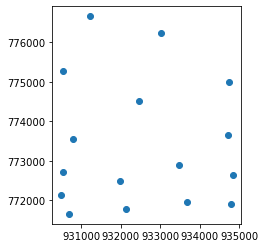

In [134]:
taz_maz.query("TAZ_REG == 466").plot();

In [135]:
taz_maz.geometry = maz.geometry

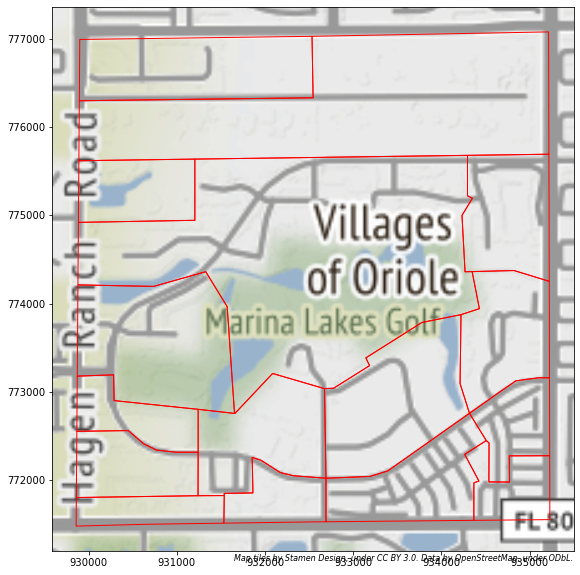

In [136]:
ax = taz_maz.query("TAZ_REG == 466").plot(color='none',edgecolor='red')
tt.mapping.add_basemap(ax, zoom=14, crs=maz.crs);

# Using Static Mapping

In [137]:
import transportation_tutorials as tt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point

In [138]:
maz = gpd.read_file(tt.data('SERPM8-MAZSHAPE'))
maz.head()

,OBJECTID,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,geometry
0,1,5347,8589.393674,3.111034e+06,71,953130,724165,"POLYGON ((953970.466 723936.081, 953972.382 72..."
1,2,5348,11974.067469,7.628753e+06,175,907018,634551,"POLYGON ((908505.280 635081.774, 908488.945 63..."
2,3,5349,9446.131753,4.007041e+06,92,923725,707062,"POLYGON ((922736.637 708387.692, 923950.960 70..."
3,4,5350,21773.153739,2.487397e+07,571,908988,713484,"POLYGON ((908334.237 715692.263, 908714.653 71..."
4,5,5351,17882.701416,1.963139e+07,451,909221,717493,"POLYGON ((911883.019 719309.326, 911940.995 71..."


In [139]:
maz_data = pd.read_csv(tt.data('SERPM8-MAZDATA', '*.csv'))
maz_data.head()

,mgra,TAZ,HH,POP,emp_self,emp_ag,emp_const_non_bldg_prod,emp_const_non_bldg_office,emp_utilities_prod,emp_utilities_office,emp_const_bldg_prod,emp_const_bldg_office,emp_mfg_prod,emp_mfg_office,emp_whsle_whs,emp_trans,emp_retail,emp_prof_bus_svcs,emp_prof_bus_svcs_bldg_maint,emp_pvt_ed_k12,emp_pvt_ed_post_k12_oth,emp_health,emp_personal_svcs_office,emp_amusement,emp_hotel,emp_restaurant_bar,emp_personal_svcs_retail,emp_religious,emp_pvt_hh,emp_state_local_gov_ent,emp_scrap_other,emp_fed_non_mil,emp_fed_mil,emp_state_local_gov_blue,emp_state_local_gov_white,emp_public_ed,emp_own_occ_dwell_mgmt,emp_fed_gov_accts,emp_st_lcl_gov_accts,emp_cap_accts,emp_total,collegeEnroll,otherCollegeEnroll,AdultSchEnrl,EnrollGradeKto8,EnrollGrade9to12,PrivateEnrollGradeKto8,ech_dist,hch_dist,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,TotInt,DUDen,EmpDen,PopDen,RetEmpDen,IntDenBin,EmpDenBin,DuDenBin,POINT_X,POINT_Y,ACRES,HotelRoomTotal,mall_flag,beachAcres,geoSRate,geoSRateNm
0,1,2901,43,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,0.08,0.01,0.26,0.00,1,1,1,841743,586817,510,0,0,0,1,1
1,2,2902,9,21,0,1,1006,0,8,0,0,0,0,0,0,0,1,17,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1053,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0.24,0.01,0.00,1,1,1,855391,585688,5678,0,0,0,1,1
2,3,2903,403,1389,0,0,6,0,0,0,0,0,0,0,6,0,10,11,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,4.20,0.39,13.75,0.05,1,1,1,858417,549492,85,0,0,0,1,1
3,4,2903,477,1659,0,0,3,0,0,0,0,0,0,0,3,0,13,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,30,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,2.34,0.38,8.14,0.05,1,1,1,858468,552269,103,0,0,0,1,1
4,5,2903,374,1389,0,0,11,0,0,0,0,0,2,0,5,5,15,11,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,108,0,0,0,1662,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,3.40,0.35,11.55,0.04,1,1,1,859899,552161,72,0,0,0,1,1


In [144]:
fl_county = gpd.read_file(tt.data('FL-COUNTY-SHAPE'))
fl_county

,OBJECTID,COASTBND,DATESTAMP,SHAPELEN,geometry
0,34,C,2000-05-16T00:00:00.000Z,15701.109822,"LINESTRING (-81.50068 30.55978, -81.50273 30.5..."
1,49,C,2000-05-16T00:00:00.000Z,6079.644914,"LINESTRING (-87.14553 30.34786, -87.14090 30.3..."
2,72,B,2000-05-16T00:00:00.000Z,38227.473473,"LINESTRING (-85.39133 30.03337, -85.39151 30.0..."
3,80,B,2000-05-16T00:00:00.000Z,175609.568525,"LINESTRING (-83.36718 30.26072, -83.36726 30.2..."
4,91,B,2000-05-16T00:00:00.000Z,15862.552238,"LINESTRING (-82.04936 30.18684, -82.04939 30.1..."
...,...,...,...,...,...
611,487,C,2000-05-16T00:00:00.000Z,346802.350381,"LINESTRING (-82.35453 26.94597, -82.35430 26.9..."
612,493,C,2000-05-16T00:00:00.000Z,465637.246785,"LINESTRING (-80.68862 28.58176, -80.69278 28.5..."
613,599,B,2000-05-16T00:00:00.000Z,108488.191856,"LINESTRING (-81.14219 27.64321, -81.14232 27.6..."
614,606,C,2000-05-16T00:00:00.000Z,451577.894372,"LINESTRING (-80.37508 25.30766, -80.37526 25.3..."


In [143]:
# There is no COUNTYNAME Column in this 'FL-COUNTY-SHAPE' file
md_county = fl_county.query("COUNTYNAME == 'DADE'")

UndefinedVariableError: name 'COUNTYNAME' is not defined

# Using Dynamic Mapping

In [145]:
import transportation_tutorials as tt
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Polygon

In [146]:
maz = gpd.read_file(tt.data('SERPM8-MAZSHAPE'))
maz_data = pd.read_csv(tt.data('SERPM8-MAZDATA', '*.csv'))

In [147]:
maz.head()

,OBJECTID,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,geometry
0,1,5347,8589.393674,3.111034e+06,71,953130,724165,"POLYGON ((953970.466 723936.081, 953972.382 72..."
1,2,5348,11974.067469,7.628753e+06,175,907018,634551,"POLYGON ((908505.280 635081.774, 908488.945 63..."
2,3,5349,9446.131753,4.007041e+06,92,923725,707062,"POLYGON ((922736.637 708387.692, 923950.960 70..."
3,4,5350,21773.153739,2.487397e+07,571,908988,713484,"POLYGON ((908334.237 715692.263, 908714.653 71..."
4,5,5351,17882.701416,1.963139e+07,451,909221,717493,"POLYGON ((911883.019 719309.326, 911940.995 71..."


In [148]:
maz.crs

<Projected CRS: EPSG:2236>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Florida - SPCS - E
- bounds: (-82.33, 24.41, -79.97, 30.83)
Coordinate Operation:
- name: SPCS83 Florida East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

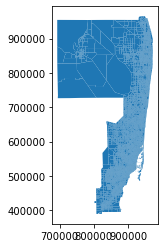

In [149]:
maz.plot()

In [150]:
maz_data.head()

,mgra,TAZ,HH,POP,emp_self,emp_ag,emp_const_non_bldg_prod,emp_const_non_bldg_office,emp_utilities_prod,emp_utilities_office,emp_const_bldg_prod,emp_const_bldg_office,emp_mfg_prod,emp_mfg_office,emp_whsle_whs,emp_trans,emp_retail,emp_prof_bus_svcs,emp_prof_bus_svcs_bldg_maint,emp_pvt_ed_k12,emp_pvt_ed_post_k12_oth,emp_health,emp_personal_svcs_office,emp_amusement,emp_hotel,emp_restaurant_bar,emp_personal_svcs_retail,emp_religious,emp_pvt_hh,emp_state_local_gov_ent,emp_scrap_other,emp_fed_non_mil,emp_fed_mil,emp_state_local_gov_blue,emp_state_local_gov_white,emp_public_ed,emp_own_occ_dwell_mgmt,emp_fed_gov_accts,emp_st_lcl_gov_accts,emp_cap_accts,emp_total,collegeEnroll,otherCollegeEnroll,AdultSchEnrl,EnrollGradeKto8,EnrollGrade9to12,PrivateEnrollGradeKto8,ech_dist,hch_dist,parkarea,hstallsoth,hstallssam,hparkcost,numfreehrs,dstallsoth,dstallssam,dparkcost,mstallsoth,mstallssam,mparkcost,TotInt,DUDen,EmpDen,PopDen,RetEmpDen,IntDenBin,EmpDenBin,DuDenBin,POINT_X,POINT_Y,ACRES,HotelRoomTotal,mall_flag,beachAcres,geoSRate,geoSRateNm
0,1,2901,43,169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,0.08,0.01,0.26,0.00,1,1,1,841743,586817,510,0,0,0,1,1
1,2,2902,9,21,0,1,1006,0,8,0,0,0,0,0,0,0,1,17,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1053,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,0.00,0.24,0.01,0.00,1,1,1,855391,585688,5678,0,0,0,1,1
2,3,2903,403,1389,0,0,6,0,0,0,0,0,0,0,6,0,10,11,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,4.20,0.39,13.75,0.05,1,1,1,858417,549492,85,0,0,0,1,1
3,4,2903,477,1659,0,0,3,0,0,0,0,0,0,0,3,0,13,5,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,30,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,2.34,0.38,8.14,0.05,1,1,1,858468,552269,103,0,0,0,1,1
4,5,2903,374,1389,0,0,11,0,0,0,0,0,2,0,5,5,15,11,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,108,0,0,0,1662,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0.0,0,3.40,0.35,11.55,0.04,1,1,1,859899,552161,72,0,0,0,1,1


In [151]:
maz_data = maz_data[['mgra', 'POP', 'PopDen', 'emp_total']]

In [152]:
maz = maz.merge(maz_data, how = 'left', left_on = 'MAZ', right_on = 'mgra')

In [153]:
maz['ExactPopDen'] = maz['POP'] / maz.area * 5280**2

In [154]:
maz = maz.sort_values(by = 'ExactPopDen', ascending = False).head(5)

In [155]:
from pyproj import Proj, transform
input_Proj  = Proj("+init=EPSG:2236",preserve_units=True)
output_Proj = Proj("+init=EPSG:4326")

point_x = []
point_y = []

for index, row in maz.iterrows():

    coor = transform(input_Proj,output_Proj,row.POINT_X, row.POINT_Y)
    point_x.append(coor[0])
    point_y.append(coor[1])

maz['POINT_X_'] = point_x
maz['POINT_Y_'] = point_y

In [156]:
maz

,OBJECTID,MAZ,SHAPE_LENG,SHAPE_AREA,ACRES,POINT_X,POINT_Y,geometry,mgra,POP,PopDen,emp_total,ExactPopDen,POINT_X_,POINT_Y_
8719,8720,2043,1118.734044,73775.530919,2,923754,523748,"POLYGON ((923616.360 523581.479, 923673.826 52...",2043,1271,33.70,2127,480287.243731,-80.186881,25.772270
7439,7440,763,4598.270892,96146.266956,2,932171,571467,"POLYGON ((932668.742 572438.537, 932649.927 57...",763,869,16.03,0,251973.689328,-80.160380,25.903406
8753,8754,2077,2213.840968,284133.182991,7,922641,521139,"POLYGON ((922916.401 521429.725, 922822.816 52...",2077,1508,52.82,1040,147960.990538,-80.190312,25.765111
8640,8641,1964,2578.656554,344555.061769,8,923398,531247,"POLYGON ((923850.808 531288.732, 923820.573 53...",1964,1755,25.74,62,141999.341843,-80.187822,25.792907
8642,8643,1966,2030.071693,247320.734972,6,923906,530650,"POLYGON ((924173.772 530376.953, 924007.855 53...",1966,1118,22.44,978,126022.798709,-80.186290,25.791256


In [157]:
maz_map = folium.Map(location = [maz.POINT_Y_.mean(), maz.POINT_X_.mean()], tiles = 'Stamen Toner', zoom_start = 9)

In [158]:
for index, row in maz.iterrows():
    popup = 'PopDen:{}, EMP:{}, ExactPopDen:{:,.0f}'.format(row.PopDen, row.emp_total, row.ExactPopDen)
    folium.Marker([row.POINT_Y_, row.POINT_X_], popup = popup, tooltip = 'MAZ ID:{}'.format(row.MAZ)).add_to(maz_map)

In [159]:
maz_map